In [17]:
import pandas as pd
import numpy as np
import os

In [18]:
fileLoc = './all-crypto-currencies/crypto-markets.csv'
data = pd.read_csv(fileLoc)
data = data.dropna()

In [19]:
direc = "./prediction_files/"
directory = os.path.dirname(direc)
if not os.path.exists(directory):
    os.makedirs(directory)

In [20]:
data_name_unique = ['BTC']

In [21]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [22]:
#Convert an array of values into a dataset matrix
def dataset_generate(data, step_size=1):
    dataX, dataY = [], []
    for i in range(len(data)- step_size -1):
        a = data[i:(i+ step_size), 0]
        dataX.append(a)
        dataY.append(data[i + step_size, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
def predict(days, coin_name, feature):
    new_data = {}
    coin = data.loc[data['symbol'] == coin_name]
    coin_close = coin[[feature]].reset_index(drop=True)
    print(coin_name)
    print(coin_close)
    new_data[coin_name] = coin_close
    for coin_name in data_name_unique[:3]:
        plt.plot(new_data[coin_name])
        plt.show()    
    
    #Fix random seed for reproducibility
    numpy.random.seed(7)
    dataset = new_data[coin_name]
    dataset = dataset.values
    dataset = dataset.astype('float32')
    
    #dataset = dataset.reshape(-1,1)
 
    #Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    # Split into train and test sets
    train_size = len(dataset)
    train = dataset[0:train_size,:]

    # Reshape into X=t and Y=t+1
    step_size = 1
    trainX, trainY = dataset_generate(train, step_size)
        
    # Reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        
    model = Sequential()
    model.add(LSTM(100, activation='tanh', input_dim= step_size))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, nb_epoch=25, batch_size=1, verbose=2)
    # make predictions

    trainPredict = model.predict(trainX)
    trainLen = len(trainPredict)
    testPredict = []
 
    input = trainY[-1]
    temp = [[input]]
    predX = [temp]
 
    a = model.predict(numpy.array(predX))
    b = a.tolist ()
    predX = [b]
    testPredict.append(b[0])
    
    for i in range(days-1):
        print ('Iteration %d: Done' % i)
        trainX = numpy.concatenate([trainX, [b]])
        trainY = numpy.concatenate ([trainY, b[0]])
        model.fit (trainX, trainY, nb_epoch=25, batch_size=1, verbose=2)
        a = model.predict (numpy.array ([b]))
        b = a.tolist ()
        testPredict.append (b[0])
        print ('Prediction %d:'%i, b)
    
    testPredict = numpy.array(testPredict)
    filename = direc+"coin_"+coin_name+"_"+feature+".txt";
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    testPredict = scaler.inverse_transform(numpy.array(testPredict))
    
    testPredict.tofile(filename, sep=',', format="%s")

    testPredict = numpy.pad(testPredict, (len(trainPredict),0), 'constant', constant_values=(np.nan, 0))
    
    # plot baseline and predictions
    plt.figure(figsize=(50,30))
    plt.tick_params(axis='both', which='major', labelsize=40)
    plt.tick_params(axis='both', which='minor', labelsize=40)

    a = plt.plot(scaler.inverse_transform(dataset), label='dataset', linewidth=7.0)
    b = plt.plot(trainPredict, label='Trained Predicton', linewidth=7.0)
    c = plt.plot(testPredict, label='Test Prediction', linewidth=7.0)
    plt.legend(loc=2, prop={'size': 40}, labels=["dataset",'Trained Predicton','Test Prediction'])
    plt.ylabel('Close Price', fontsize=50)
    plt.xlabel('Time Series Data from 2013 to 2018', fontsize=50)
    plt.show()

BTC
         close
0       134.21
1       144.54
2       139.00
3       116.99
4       105.21
5        97.75
6       112.50
7       115.91
8       112.30
9       111.50
10      113.57
11      112.67
12      117.20
13      115.24
14      115.00
15      117.98
16      111.50
17      114.22
18      118.76
19      123.02
20      123.50
21      121.99
22      122.00
23      122.88
24      123.89
25      126.70
26      133.20
27      131.98
28      133.48
29      129.75
...        ...
1763   9813.07
1764   9664.73
1765  10366.70
1766  10725.60
1767  10397.90
1768  10951.00
1769  11086.40
1770  11489.70
1771  11512.60
1772  11573.30
1773  10779.90
1774   9965.57
1775   9395.01
1776   9337.55
1777   8866.00
1778   9578.63
1779   9205.12
1780   9194.85
1781   8269.81
1782   8300.86
1783   8338.35
1784   7916.88
1785   8223.68
1786   8630.65
1787   8913.47
1788   8929.28
1789   8728.47
1790   8879.62
1791   8668.12
1792   8495.78

[1793 rows x 1 columns]


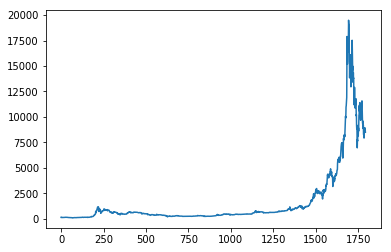

C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, activation="tanh", input_shape=(None, 1))`
C:\Users\raghu\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
 - 7s - loss: 0.0043
Iteration 0: Done
Epoch 1/1
 - 6s - loss: 2.5210e-04
Prediction 0: [[0.4390212893486023]]
Iteration 1: Done
Epoch 1/1
 - 4s - loss: 2.5338e-04
Prediction 1: [[0.47783422470092773]]
Iteration 2: Done
Epoch 1/1
 - 4s - loss: 2.3824e-04
Prediction 2: [[0.47950541973114014]]
Iteration 3: Done
Epoch 1/1
 - 4s - loss: 2.3060e-04
Prediction 3: [[0.5463482141494751]]
Iteration 4: Done
Epoch 1/1
 - 4s - loss: 2.3106e-04
Prediction 4: [[0.5568801164627075]]
Iteration 5: Done
Epoch 1/1
 - 4s - loss: 2.1144e-04
Prediction 5: [[0.5444904565811157]]
Iteration 6: Done
Epoch 1/1
 - 4s - loss: 2.3295e-04
Prediction 6: [[0.5430058240890503]]
Iteration 7: Done
Epoch 1/1
 - 4s - loss: 2.0608e-04
Prediction 7: [[0.5318818092346191]]
Iteration 8: Done
Epoch 1/1
 - 4s - loss: 2.1943e-04
Prediction 8: [[0.5266568064689636]]


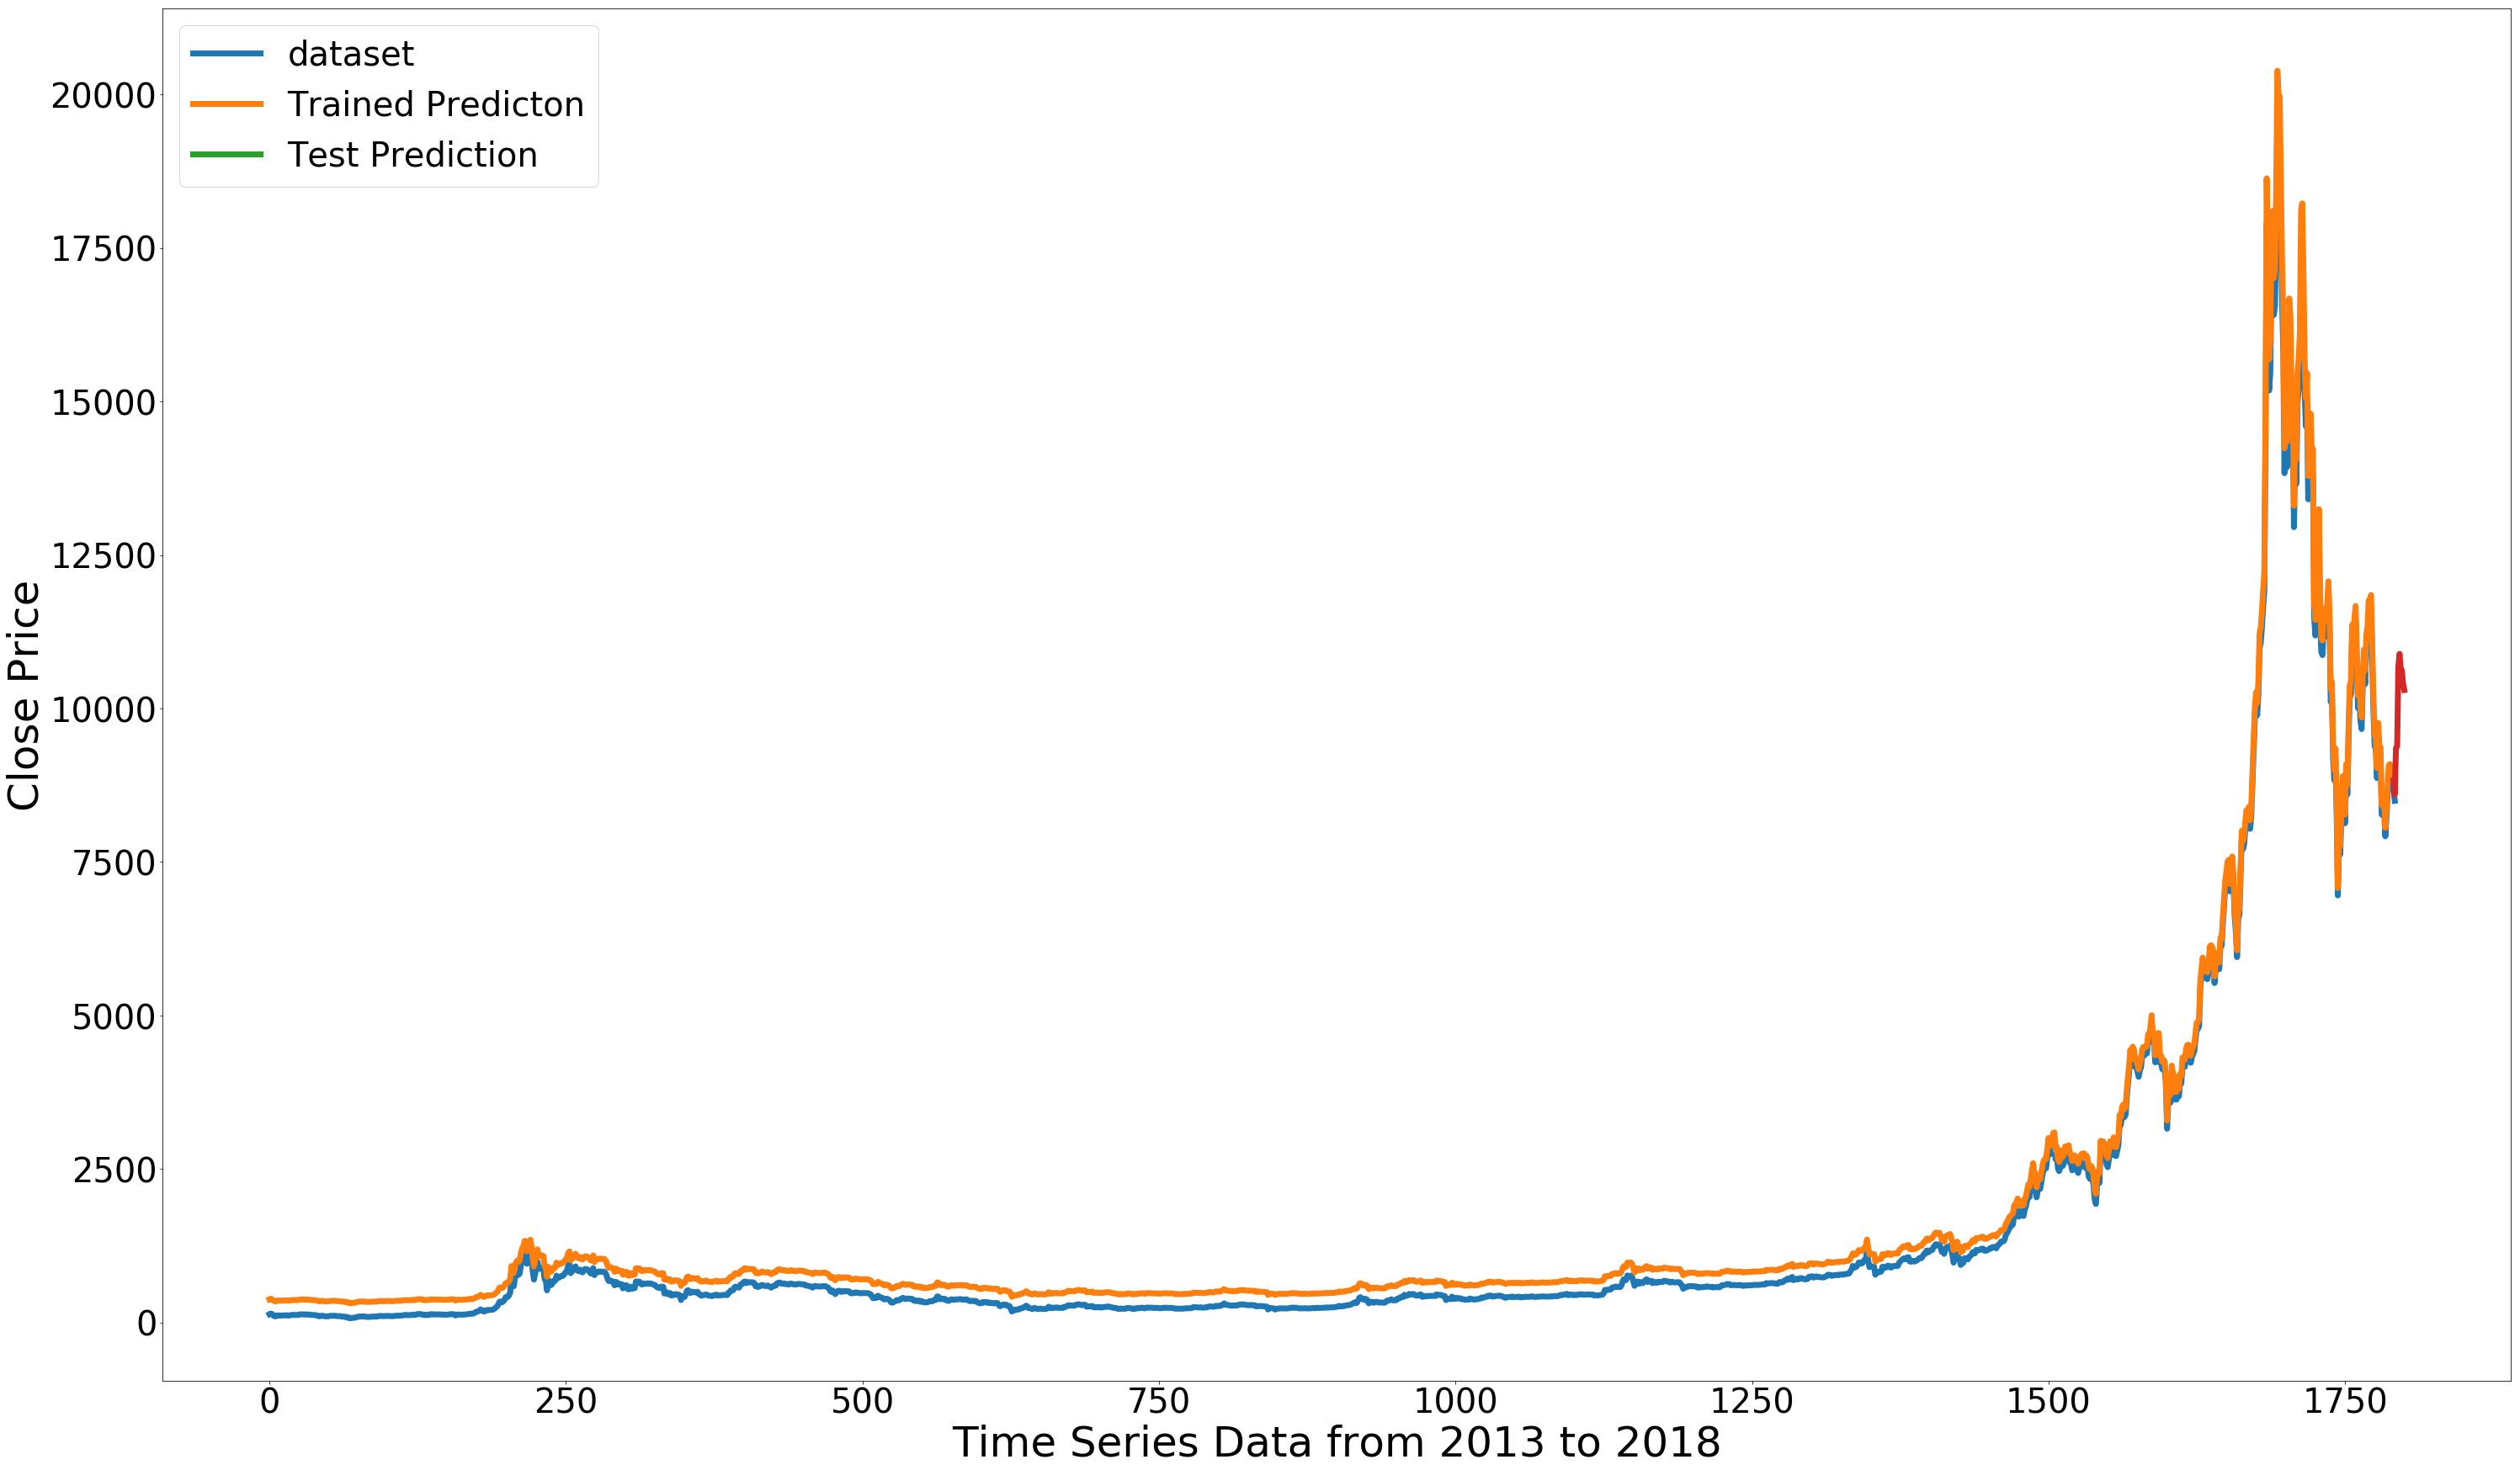

BTC
            market
0     1.500520e+09
1     1.491160e+09
2     1.597780e+09
3     1.542820e+09
4     1.292190e+09
5     1.180070e+09
6     1.089890e+09
7     1.254760e+09
8     1.289470e+09
9     1.248470e+09
10    1.219450e+09
11    1.259980e+09
12    1.255970e+09
13    1.311050e+09
14    1.288630e+09
15    1.279980e+09
16    1.315720e+09
17    1.242760e+09
18    1.274620e+09
19    1.319590e+09
20    1.379140e+09
21    1.376370e+09
22    1.368910e+09
23    1.363940e+09
24    1.374130e+09
25    1.384780e+09
26    1.413300e+09
27    1.489950e+09
28    1.478030e+09
29    1.495520e+09
...            ...
1763  1.736820e+11
1764  1.654070e+11
1765  1.632830e+11
1766  1.755360e+11
1767  1.805100e+11
1768  1.754270e+11
1769  1.854560e+11
1770  1.875810e+11
1771  1.942890e+11
1772  1.949030e+11
1773  1.943780e+11
1774  1.826310e+11
1775  1.682410e+11
1776  1.591850e+11
1777  1.581190e+11
1778  1.497160e+11
1779  1.624210e+11
1780  1.551680e+11
1781  1.558910e+11
1782  1.402750e+11
1783  1.

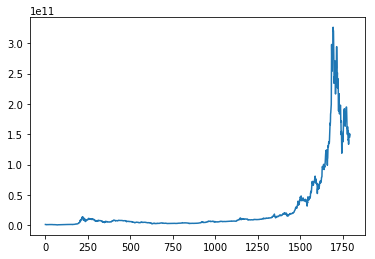

Epoch 1/1
 - 6s - loss: 0.0044
Iteration 0: Done
Epoch 1/1
 - 4s - loss: 2.2969e-04
Prediction 0: [[0.4352474510669708]]
Iteration 1: Done
Epoch 1/1
 - 4s - loss: 2.5095e-04
Prediction 1: [[0.4325835108757019]]
Iteration 2: Done
Epoch 1/1
 - 4s - loss: 2.4316e-04
Prediction 2: [[0.43890219926834106]]
Iteration 3: Done
Epoch 1/1
 - 4s - loss: 2.3424e-04
Prediction 3: [[0.47128942608833313]]
Iteration 4: Done
Epoch 1/1
 - 4s - loss: 2.5160e-04
Prediction 4: [[0.46460476517677307]]
Iteration 5: Done
Epoch 1/1
 - 4s - loss: 2.0852e-04
Prediction 5: [[0.5298743844032288]]
Iteration 6: Done
Epoch 1/1
 - 4s - loss: 2.2248e-04
Prediction 6: [[0.5438184142112732]]
Iteration 7: Done
Epoch 1/1
 - 4s - loss: 2.0919e-04
Prediction 7: [[0.5433894395828247]]
Iteration 8: Done
Epoch 1/1
 - 4s - loss: 2.2668e-04
Prediction 8: [[0.5613113641738892]]


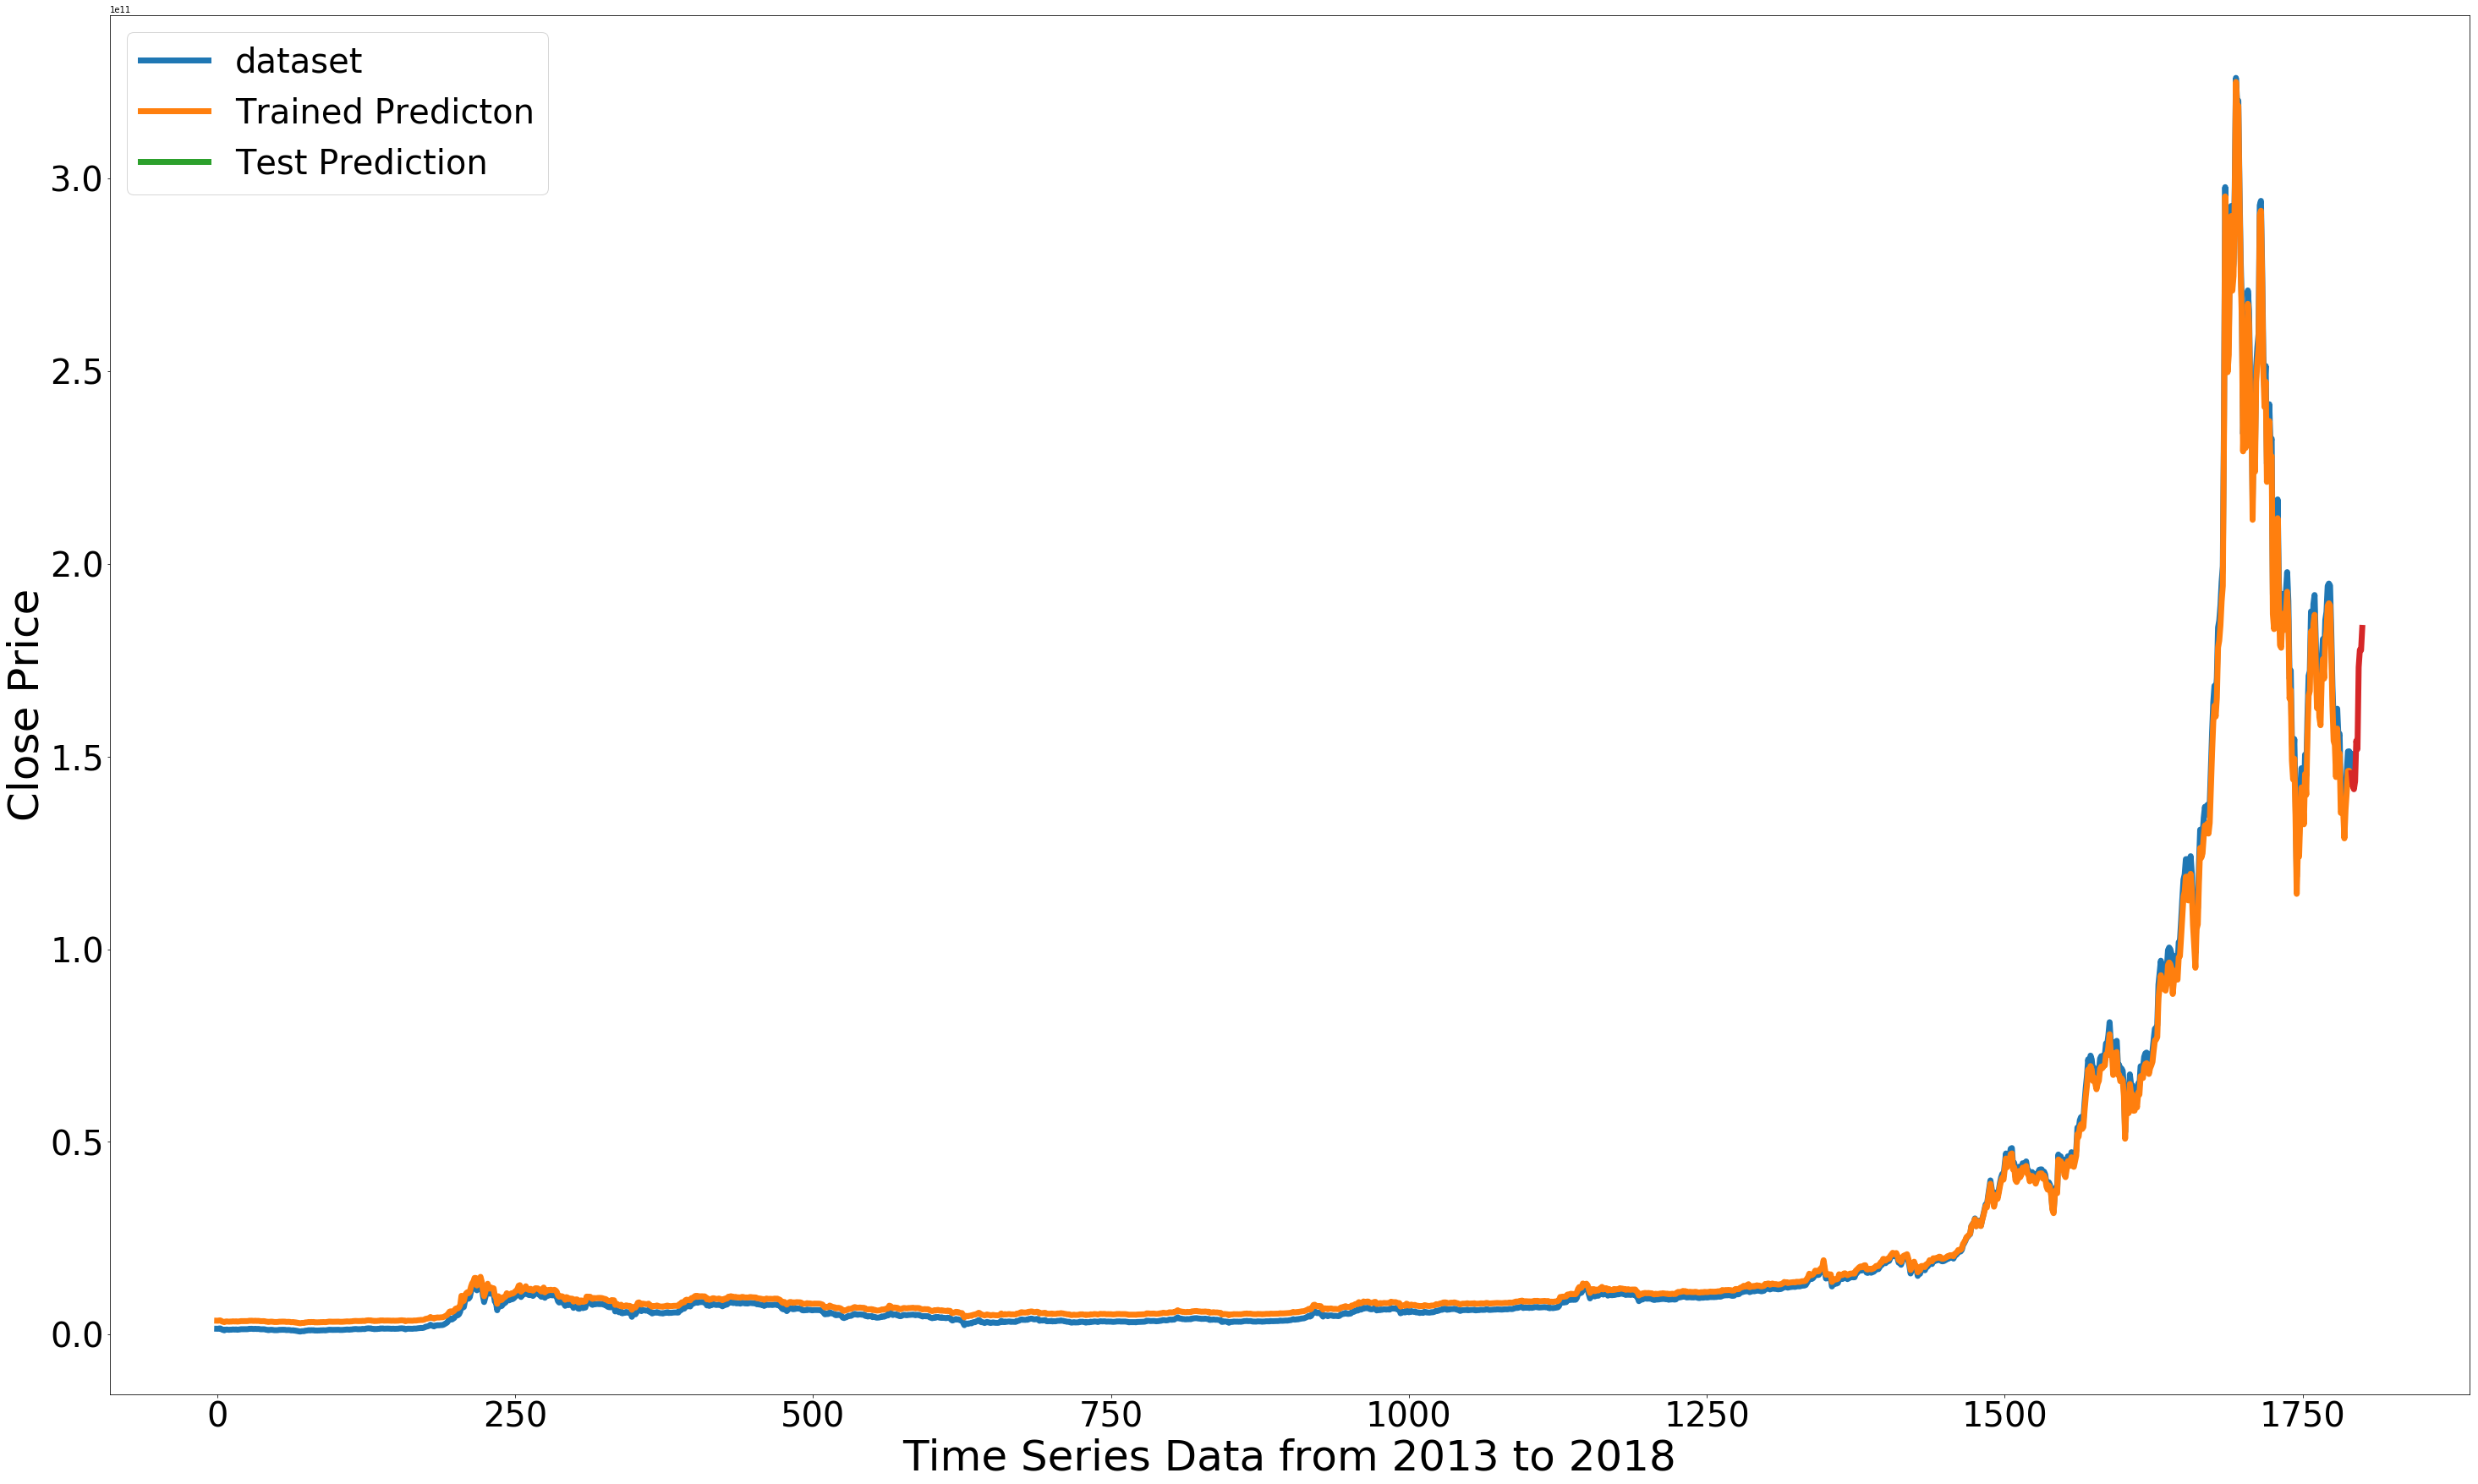

In [24]:
for coin_name in data_name_unique:
    predict(10, coin_name, 'close')
    predict(10, coin_name, 'market')